## High Level Computer Vision 
### Exercise 1: Image Filtering and Object Identification

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import signal
from scipy.signal import convolve2d as conv2
from numpy import histogram as hist 

In this exercise, you will first familiarise yourself with basic image filtering routines. In the second part, you will develop a simple image querying system that accepts a query image as input and then finds a set of similar images in the database. To compare images, you will implement some simple histogram-based distance functions and evaluate their performance in combination with different image representations.

### Question 1: Image Filtering (10 points)

**Q1.1** Implement a method that computes the values of a 1-D Gaussian for a given variance $\sigma^2$. The method should also give a vector of values on which the Gaussian filter is defined: integer values on the interval $[-3\sigma,3\sigma]$.
  \begin{equation}
    G=\frac{1}{\sqrt{2\pi}\sigma}\exp(-\frac{x^2}{2\sigma^2}).
  \end{equation}

In [2]:
def gauss(sigma):
    ### Please input your answer here.
    x = np.arange(math.ceil(-3. * sigma), math.floor(3. * sigma) + 1)
    Gx = 1./(np.sqrt(2 * np.pi)* sigma) * np.exp(- (np.power(x,2))/(2 * np.power(sigma,2)))
    return Gx, x

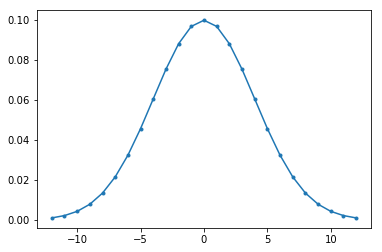

In [3]:
### The following code is used for evaluation.

sigma = 4.0
[gx, x] = gauss(sigma)

plt.figure()
plt.plot(x, gx, '.-')
plt.show()

**Q1.2** Implement a 2D Gaussian filter. The function should take an image as an input and return the result of the convolution of this image a with 2D Gaussian kernel of given variance $\sigma^2$. See **Figure 1** for an illustration of Gaussian filtering. You can take advantage of the `convolve2d` function from the `scipy` library if you don't want to implement convolution yourself.

*Hint: use the fact that the 2D Gaussian filter is separable to speed up computations.*

**Figure 1: Left: Original image. Right: Image after applying a Gaussian filter with $\sigma = 4.0$.**

<img src="./source/not_smooth.png" width="300" align=left>
<img src="./source/smooth.png" width="300" align=left>

In [4]:
def gaussianfilter(img, sigma):
    ### Please input your answer here.
    
    gaussian_1d = gauss(sigma)[0]
    kernel = gaussian_1d.reshape(1, gaussian_1d.size)
    outimage = conv2(conv2(img, kernel, boundary='symm', mode='same'), kernel.T, boundary='symm', mode = 'same')   

    return outimage

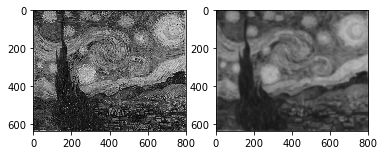

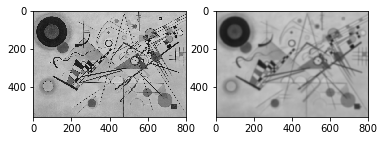

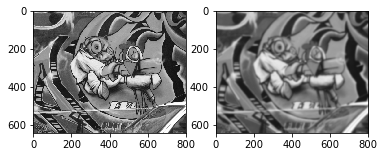

In [5]:
### The following code is used for evaluation.

def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

def run_one_img_q1_2(image_path):
    img = rgb2gray(np.array(Image.open(image_path)))
    smooth_img = gaussianfilter(img, sigma)

    plt.figure()
    ax1 = plt.subplot(1,2,1)
    ax2 = plt.subplot(1,2,2)
    plt.sca(ax1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.sca(ax2)
    plt.imshow(smooth_img, cmap='gray', vmin=0, vmax=255)
    plt.show()
    
run_one_img_q1_2('./source/night.png')
run_one_img_q1_2('./source/kand.png')
run_one_img_q1_2('./source/graf.png')

**Q1.3** Implement a function `gaussdx` for creating a Gaussian derivative filter in 1D according to the following equation:

\begin{eqnarray}
    \frac{d}{dx}G&=&\frac{d}{dx}\frac{1}{\sqrt{2\pi}\sigma}\exp(-\frac{x^2}{2\sigma^2})\\
    &=& -\frac{1}{\sqrt{2\pi}\sigma^3}x \exp(-\frac{x^2}{2\sigma^2})
\end{eqnarray}

In [6]:
def gaussdx(sigma):
    ### Please input your answer here.
    
    gauss_filter_1D, x = gauss(sigma)
    D = - x /np.power(sigma,2) * gauss_filter_1D 
    
    return D, x

The effect of applying a filter can be studied by observing its
so-called \textit{impulse response}. For this, create a test image
in which only the central pixel has a non-zero value:

```
  imgImp = np.zeros((27,27))
  imgImp[14,14] = 1.0
```

Now, create the following 1D filter kernels $G$ and $D$.

```
  sigma = 5.0
  G = gauss(sigma)
  D = gaussdx(sigma)
```

What happens when you apply the following filter combinations?
- first $G$,  then $G^T$;
- first $G$,  then $D^T$;
- first $D$,  then $G^T$;
- first $G^T$, then $D$;
- first $D^T$, then $G$,

where $G^T$ refers to the transpose of vector $G$.
Visualize the results and put them in your report.

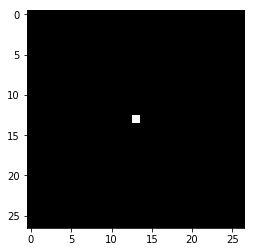

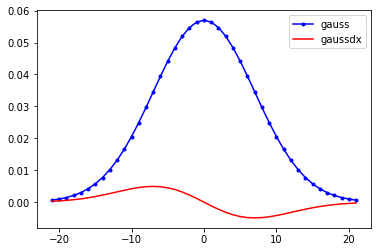

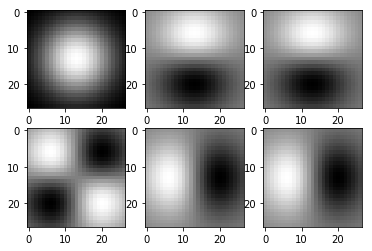

In [7]:
### The following code is used for evaluation.

img = np.zeros([27,27])
img[13, 13] = 1.0
plt.figure(), plt.imshow(img, cmap='gray')

sigma = 7.0
[G, x] = gauss(sigma)
[D, x] = gaussdx(sigma)

plt.figure()
plt.plot(x, G, 'b.-')
plt.plot(x, D, 'r-')
plt.legend( ('gauss', 'gaussdx'))
plt.show()

G = G.reshape(1, G.size)
D = D.reshape(1, D.size)

plt.figure()
plt.subplot(2,3,1)
plt.imshow(conv2(conv2(img, G, 'same'), G.T, 'same') , cmap='gray')
plt.subplot(2,3,2)
plt.imshow(conv2(conv2(img, G, 'same'), D.T, 'same') , cmap='gray')
plt.subplot(2,3,3)
plt.imshow(conv2(conv2(img, D.T, 'same'), G, 'same') , cmap='gray')
plt.subplot(2,3,4)
plt.imshow(conv2(conv2(img, D, 'same'), D.T, 'same') , cmap='gray')
plt.subplot(2,3,5)
plt.imshow(conv2(conv2(img, D, 'same'), G.T, 'same') , cmap='gray')
plt.subplot(2,3,6)
plt.imshow(conv2(conv2(img, G.T, 'same'), D, 'same') , cmap='gray')
plt.show()

**Q1.4** Use the functions `gauss` and `gaussdx` in order to implement a function `gaussderiv` that returns the 2D Gaussian derivatives of an input image in x and y direction. Try the function on the three test images.

In [8]:
def gaussderiv(img, sigma):
    ### Please input your answer here.
    
    gaussian_1d, _ = gauss(sigma)
    gaussian_1d_dx, _ = gaussdx(sigma)
    gaussian_2d = gaussian_1d.reshape(1, gaussian_1d.size)
    gaussian_2d_dx = gaussian_1d_dx.reshape(1, gaussian_1d_dx.size)
   
    imgDx = conv2(conv2(img, gaussian_2d_dx, mode = 'same', boundary = 'symm'), gaussian_2d.T, mode = 'same', boundary = 'symm')
    imgDy = conv2(conv2(img, gaussian_2d, mode = 'same', boundary = 'symm'), gaussian_2d_dx.T, mode = 'same', boundary = 'symm')

    return imgDx, imgDy

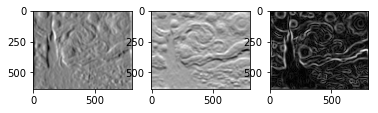

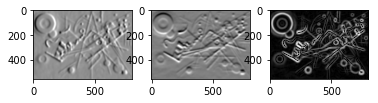

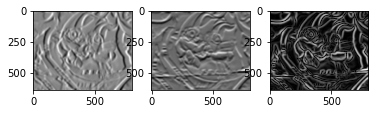

In [9]:
### The following code is used for evaluation.

def run_one_img_q1_4(image_path):
    img_c = np.array(Image.open(image_path)).astype('double')
    img = rgb2gray(img_c)
    [imgDx, imgDy] = gaussderiv(img, 7.0)

    plt.figure()
    ax1 = plt.subplot(1,3,1)
    ax2 = plt.subplot(1,3,2)
    ax3 = plt.subplot(1,3,3)
    plt.sca(ax1)
    plt.imshow(imgDx, cmap='gray')
    plt.sca(ax2)
    plt.imshow(imgDy, cmap='gray')
    plt.sca(ax3)
    imgmag = np.sqrt(imgDx**2 + imgDy**2)
    plt.imshow(imgmag, cmap='gray')
    plt.show()
    
run_one_img_q1_4('./source/night.png')
run_one_img_q1_4('./source/kand.png')
run_one_img_q1_4('./source/graf.png')

### Question 2: Image Representations and Histogram Distances (10 points)

**Q2.1** Implement a function `normalized_histogram`, which takes a gray-value image as input and returns a normalized histogram of pixel intensities. Compare your implementation with the built-in Python function `numpy.histogram`. Your histograms and the histograms computed with Python should be approximately the same, except for the overall scale, which will be different since `numpy.histogram` does not normalize its output.

In [10]:
def normalized_histogram(img_gray, num_bins):
    assert len(img_gray.shape) == 2, 'image dimension mismatch'
    assert img_gray.dtype == 'float', 'incorrect image type'
    
    hists = np.zeros(num_bins)
    
    for i in range(img_gray.shape[0]):
        for j in range(img_gray.shape[1]):
            pos = min(num_bins - 1, int(img_gray[i,j] / 255 * num_bins))
            hists[pos] += 1
    
    hists = hists / np.sum(hists)
    bins = np.linspace(0, 255, num = hists.size + 1)

    return hists, bins

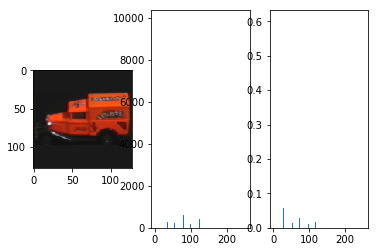

In [11]:
### The following code is used for evaluation.

img_color = np.array(Image.open('./source/model/obj100__0.png'))
img_gray = rgb2gray(img_color.astype('double'))

plt.figure()
plt.subplot(1,3,1)
plt.imshow(img_color)

plt.subplot(1,3,2)
num_bins_gray = 40
hist_gray1, bin_gray1 = hist(img_gray.reshape(img_gray.size), num_bins_gray,(0,255))
plt.bar((bin_gray1[0:-1] + bin_gray1[1:])/2, hist_gray1)

plt.subplot(1,3,3)
hist_gray2, bin_gray2 = normalized_histogram(img_gray, num_bins_gray)
plt.bar((bin_gray2[0:-1] + bin_gray2[1:])/2, hist_gray2)
plt.show()

**Q2.2** Implement other histogram types discussed during the tutorial (refer to the introduction slides). Your implementation should extend the code provided in the functions `rgb_hist`, `rg_hist`, and `dxdy_hist`. Make sure that you are using the correct range of pixel values. For “RGB” the pixel intensities are in \[0, 255\], for “rg” the values are normalized to be in \[0, 1\]. For the derivatives histograms the values depend on the σ2 of the Gaussian filter; with σ = 7.0 you can assume that the values are in the range \[−32, 32\].

In [12]:
def rgb_hist(img_color, num_bins):
    
    assert len(img_color.shape) == 3, 'image dimension mismatch'
    assert img_color.dtype == 'float', 'incorrect image type'

    hists = np.zeros((num_bins, num_bins, num_bins))
    
    for i in range(img_color.shape[0]):
        for j in range(img_color.shape[1]):
            hists[math.floor(img_color[i,j,0] /255. * num_bins),
                  math.floor(img_color[i,j,1] /255. * num_bins), 
                  math.floor(img_color[i,j,2] /255. * num_bins)] += 1
            pass

    hists /= hists.sum()
    hists = hists.reshape(hists.size)
    
    return hists

def rg_hist(img_color, num_bins):
    
    r = img_color[:,:,0] / img_color.sum(axis=2)
    g = img_color[:,:,1] / img_color.sum(axis=2)

    hists = np.zeros((num_bins, num_bins))
    
    for i in range(img_color.shape[0]):
        for j in range(img_color.shape[1]):
            r_bin_pos = min(num_bins - 1, int(r[i,j] / 1 * num_bins))
            g_bin_pos = min(num_bins - 1, int(g[i,j] / 1 * num_bins))
            hists[r_bin_pos, g_bin_pos] += 1

    hists = hists / np.sum(hists)
    hists = hists.reshape(hists.size)
    
    return hists

def dxdy_hist(img_gray, num_bins):
    
    assert len(img_gray.shape) == 2, 'image dimension mismatch'
    assert img_gray.dtype == 'float', 'incorrect image type'

    sigma = 7.0
    imgdx, imgdy = gaussderiv(img_gray, sigma)


    hists = np.zeros((num_bins, num_bins))
    for i in range(img_gray.shape[0]):
        for j in range(img_gray.shape[1]):
            x = min(num_bins - 1, int((imgdx[i,j] + 32) / 64 * num_bins))
            y = min(num_bins - 1, int((imgdy[i,j] + 32) / 64 * num_bins))
            hists[x, y] += 1
    
    hists = hists / np.sum(hists)
    hists = hists.reshape(hists.size)
    
    return hists

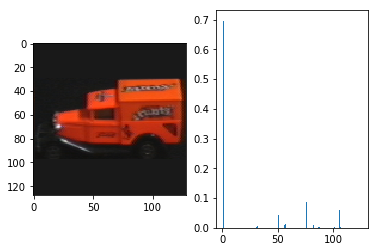

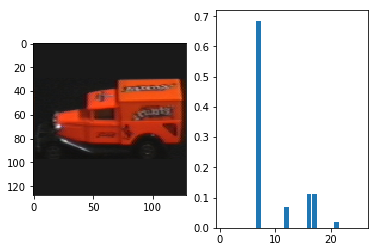

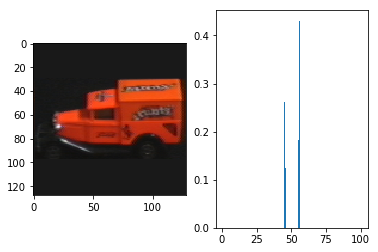

In [13]:
### The following code is used for evaluation.

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_color)

num_bins_color = 5
plt.subplot(1,2,2)
hist_rgb1 = rgb_hist(img_color.astype('double'), num_bins_color)
plt.bar(np.array(range(1,hist_rgb1.size+1)),hist_rgb1)
plt.show()

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_color)

plt.subplot(1,2,2)
num_bins_rg = 5
hist_rg = rg_hist(img_color.astype('double'), num_bins_rg)
plt.bar(np.array(range(1,hist_rg.size+1)),hist_rg)
plt.show()

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_color)

num_bins_dxdy = 10
plt.subplot(1,2,2)
hist_dxdy = dxdy_hist(img_gray.astype('double'), num_bins_dxdy)
plt.bar(np.array(range(1,hist_dxdy.size+1)),hist_dxdy)
plt.show()

**Q2.3** Implement the histogram distance functions discussed during the tutorial (refer to the introdution slides), by filling the missing code in the functions `dist_l2`, `dist_intersect`, and `dist_chi2`.

In [14]:
def dist_chi2(x,y):
    D = 0
    for i in range(len(y)):
        if y[i] != 0 or x[i] != 0:
            D += np.square(x[i] - y[i]) / (x[i] + y[i])
    return D

def dist_l2(x,y):
    return np.sqrt(np.sum((x - y)**2))

def dist_intersect(x,y):
    intersection = np.sum(np.minimum(x,y))
    return 1 - intersection

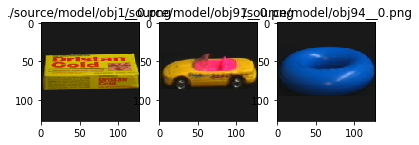

distance functions:
['l2', 'intersect', 'chi2']


histogram types:
['grayvalue', 'rgb', 'rg', 'dxdy']


compare image "./source/model/obj1__0.png" to "./source/model/obj91__0.png":
[[0.05760147 0.0578308  0.11649707 0.07602957]
 [0.13391113 0.29315186 0.237854   0.21893311]
 [0.10574426 0.50224943 0.35825487 0.23614573]]


compare image "./source/model/obj1__0.png" to "./source/model/obj94__0.png":
[[0.13088992 0.12359277 0.25162163 0.15385402]
 [0.36340332 0.4664917  0.49627686 0.3973999 ]
 [0.53934532 0.84010019 0.86641969 0.54917916]]




In [15]:
### The following code is used for evaluation.

def get_dist_by_name(x, y, dist_name):
  if dist_name == 'chi2':
    return dist_chi2(x,y)
  elif dist_name == 'intersect':
    return dist_intersect(x,y)
  elif dist_name == 'l2':
    return dist_l2(x,y)
  else:
    assert 'unknown distance: %s'%dist_name
    
def is_grayvalue_hist(hist_name):
  if hist_name == 'grayvalue' or hist_name == 'dxdy':
    return True
  elif hist_name == 'rgb' or hist_name == 'rg':
    return False
  else:
    assert False, 'unknown histogram type'
    
def get_hist_by_name(img1_gray, num_bins_gray, dist_name):
  if dist_name == 'grayvalue':
    return normalized_histogram(img1_gray, num_bins_gray)
  elif dist_name == 'rgb':
    return rgb_hist(img1_gray, num_bins_gray)
  elif dist_name == 'rg':
    return rg_hist(img1_gray, num_bins_gray)
  elif dist_name == 'dxdy':
    return dxdy_hist(img1_gray, num_bins_gray)
  else:
    assert 'unknown distance: %s'%dist_name

image_files1 = ['./source/model/obj1__0.png']
image_files2 = ['./source/model/obj91__0.png', './source/model/obj94__0.png']

plt.figure()
plt.subplot(1,3,1); plt.imshow(np.array(Image.open(image_files1[0])), vmin=0, vmax=255); plt.title(image_files1[0])
plt.subplot(1,3,2); plt.imshow(np.array(Image.open(image_files2[0])), vmin=0, vmax=255); plt.title(image_files2[0])
plt.subplot(1,3,3); plt.imshow(np.array(Image.open(image_files2[1])), vmin=0, vmax=255); plt.title(image_files2[1])
plt.show()


print('distance functions:')
distance_types = ['l2', 'intersect', 'chi2']
print(distance_types)
print('\n')

print('histogram types:')
hist_types = ['grayvalue', 'rgb', 'rg', 'dxdy']
print(hist_types)
print('\n')

num_bins_color = 30;
num_bins_gray = 90;

for imgidx1 in range(len(image_files1)):
  img1_color = np.array(Image.open(image_files1[imgidx1]))
  img1_gray = rgb2gray(img1_color.astype('double'))
  img1_color = img1_color.astype('double')

  for imgidx2 in range(len(image_files2)):
    img2_color = np.array(Image.open(image_files2[imgidx2]))
    img2_gray = rgb2gray(img2_color.astype('double'))
    img2_color = img2_color.astype('double')

    D = np.zeros( (len(distance_types), len(hist_types)) )

    for didx in range(len(distance_types)):

      for hidx in range(len(hist_types)):


        if is_grayvalue_hist(hist_types[hidx]):
          hist1 = get_hist_by_name(img1_gray, num_bins_gray, hist_types[hidx])
          hist2 = get_hist_by_name(img2_gray, num_bins_gray, hist_types[hidx])

          if len(hist1) == 2 and len(hist1[0]) > 1:
            hist1 = hist1[0]
          if len(hist2) == 2 and len(hist2[0]) > 1:
            hist2 = hist2[0]

          D[didx,hidx] = get_dist_by_name(hist1, hist2, distance_types[didx])
        else:
          hist1 = get_hist_by_name(img1_color, num_bins_color, hist_types[hidx])
          hist2 = get_hist_by_name(img2_color, num_bins_color, hist_types[hidx])

          if len(hist1) == 2 and len(hist1[0]) > 1:
            hist1 = hist1[0]
          if len(hist2) == 2 and len(hist2[0]) > 1:
            hist2 = hist2[0]

          D[didx,hidx] = get_dist_by_name(hist1, hist2, distance_types[didx])

    print('compare image "%s" to "%s":'% (image_files1[imgidx1], image_files2[imgidx2]))
    print(D)
    print('\n')


### Question 3: Object Identification (10 points)

**Q3.1** Having implemented different distance functions and image histograms, we can now test how suitable they are for retrieving images in a query-by-example scenario. Implement a function `find_best_match`, which takes a list of model images and a list of query images and for each query image returns the index of the closest model image. The function should take string parameters, which identify the distance function, the histogram function, and the number of histogram bins. See the comments at the beginning of `find_best_match` for more details. Aside from the indices of the best matching images, your implementation should also return a matrix that contains the distances between all pairs of model and query images.

In [16]:
def find_best_match(model_images, query_images, dist_type, hist_type, num_bins):

    hist_isgray = is_grayvalue_hist(hist_type) 

    model_hists = compute_histograms(model_images, hist_type, hist_isgray, num_bins)
    query_hists = compute_histograms(query_images, hist_type, hist_isgray, num_bins)

    D = np.zeros((len(model_images), len(query_images)))
    best_match = np.zeros(len(query_images))

    for q_idx in range(len(query_images)):
        for m_idx in range(len(model_images)):
            D[m_idx, q_idx] = get_dist_by_name(query_hists[q_idx], model_hists[m_idx], dist_type)
        best_match[q_idx] = np.argmin(D[:, q_idx])
        
    return best_match, D

def compute_histograms(image_list, hist_type, hist_isgray, num_bins):

    image_hist = []

    for i in range(len(image_list)):
        
        img_color = np.array(Image.open(image_list[i]))
        img_color = img_color.astype('double')

        img_gray = rgb2gray(img_color.astype('double'))
        
        if hist_isgray:
            hist = get_hist_by_name(img_gray, num_bins, hist_type)
        else:
            hist = get_hist_by_name(img_color, num_bins, hist_type)

        if len(hist) == 2 and len(hist[0]) > 1:
             hist = hist[0]
            
        image_hist.append(hist)


    return image_hist

In [17]:
### The following code is used for evaluation.

with open('./source/model.txt') as fp:
    model_images = fp.readlines()
model_images = [x.strip() for x in model_images] 

with open('./source/query.txt') as fp:
    query_images = fp.readlines()
query_images = [x.strip() for x in query_images] 

eval_dist_type = 'intersect';
eval_hist_type = 'rg';
eval_num_bins = 30;

[best_match, D] = find_best_match(model_images, query_images, eval_dist_type, eval_hist_type, eval_num_bins)

print(best_match)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 67. 37. 38. 39. 40. 58. 42. 43. 44. 45. 46.  4. 48. 49. 50. 51. 52. 73.
 54. 55. 56. 57. 58. 59. 60. 61. 43. 63. 31. 10. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 41. 79. 80. 81. 82. 83. 84. 61. 79. 87. 88.]


**Q3.2** Implement a function `show_neighbors` that takes a list of model images and a list of query images and for each query image visualizes several model images which are the closest to the query image according to the specified distance metric. Use the function `find_best_match` in your implementation. See **Figure 2** for an example output.

**Figure 2: A query image and the model images with color histograms similar to the query image.**

<img src="./source/fig2.png" width="600" align=left>

In [18]:
def show_neighbors(model_images, query_images, dist_type, hist_type, num_bins):
    num_nearest = 5  

    fig, ax = plt.subplots(len(query_images), (num_nearest + 1))
    fig.set_size_inches(3 * (num_nearest + 1), 3 * len(query_images))
    
    [best_match, D] = find_best_match(model_images, query_images, dist_type, hist_type, num_bins)
    
    for q_idx in range(len(query_images)):
        ax[q_idx, 0].set_title("a)")
        ax[q_idx, 0].imshow(np.array(Image.open(query_images[q_idx])), vmin = 0, vmax = 255)

        top_imgs = np.argpartition(D[:, q_idx], num_nearest)
        top_imgs = top_imgs[:num_nearest]
        for i in range(num_nearest):
            if (i == 0):
                ax[q_idx, i + 1].set_title("b)")
            ax[q_idx, i + 1].imshow(np.array(Image.open(model_images[top_imgs[i]])), vmin = 0, vmax = 255)
    plt.show()

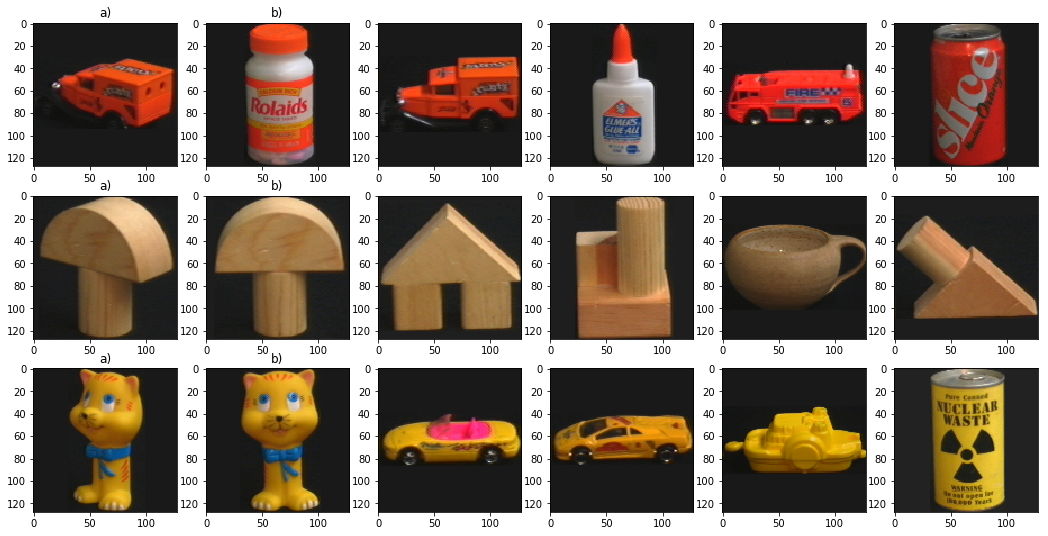

In [19]:
### The following code is used for evaluation.

query_images_vis = [query_images[i] for i in np.array([0,4,9])]
show_neighbors(model_images, query_images_vis, eval_dist_type, eval_hist_type, eval_num_bins)

### Question 4: Performance Evaluation (10 points)

**Q4.1** Sometimes instead of returning the best match for a query image, we would like to return all the model images with a distance to the query image below a certain threshold. It is, for example, the
case when there are multiple images of the query object among the model images. In order to assess
  the system performance in such scenario, we will use two quality measures: \textit{precision} and
  \textit{recall}. Denoting the threshold on the distance between the images by $\tau$ and using the following
  notation:


TP (True Positive) = number of correct matches among the images with distance \textit{smaller} than $\tau$,
<br>
FP (False Positive) = number of incorrect matches among the images with distance \textit{smaller} than $\tau$,
<br>
TN (True Negative) = number of incorrect matches among the images with distance \textit{larger} than $\tau$,
<br>
FN (False Negative) = number of correct matches among the images with distance \textit{larger} than $\tau$,


precision is given by
\begin{equation}
\mbox{precision} = \frac{\mbox{TP}}{\mbox{TP} + \mbox{FP}},
\end{equation}
and recall is given by
\begin{equation}
\mbox{recall} = \frac{\mbox{TP}}{\mbox{TP} + \mbox{FN}}.
\end{equation}

For an ideal system, there should exist a value of $\tau$ such that
both precision and recall are equal to $1$, which corresponds to
obtaining all the correct images without any false matches. However, in
reality both quantities will be somewhere in the range between $0$ and
$1$ and the goal is to make both of them as high as possible.

Implement a function `plot_rpc` that you have to compute
precision/recall pairs for a range of threshold values and then output
the precision/recall curve (RPC), which gives a good summary of system
performance at different levels of confidence. See **Figure 3** for an example of an RPC curve.

**Q4.2** Plot RPC curves for different histogram types, distances, and number of bins. Submit a summary of your observations as part of your solution.

**Figure 3: Recall/precision curve evaluated on the provided set of model and query images.**

<img src="./source/fig3.png" width="400" align=left>

In [20]:
# Compute and plot the recall/precision curve
#
# D - square matrix, D(i, j) = distance between model image i, and query image j
#
# Note: assume that query and model images are in the same order, 
#i.e. correct answer for i-th query image is the i-th model image

def plot_rpc(D, plot_color):
    recall = []
    precision = []
    total_imgs = D.shape[1]
    num_images = D.shape[0]
    assert(D.shape[0] == D.shape[1])

    labels = np.diag([1] * num_images)
    
    d = D.reshape(D.size)
    l = labels.reshape(labels.size)
    
    sortidx = d.argsort()
    
    d = d[sortidx]
    l = l[sortidx]
    
    
    tp = 0
    for idx in range(len(d)):
        tp = tp + l[idx]
    
    for t in range(len(d)):    
        tp = fp = tn = fn = 0
        for dis in range(0, len(d)):
            if (dis <= t):
                if  l[dis]: 
                    tp += 1
                else:  
                    fp += 1
            else:
                if l[dis]:
                    fn += 1 
                else:
                    tn += 1

        precision.append(tp / (tp + fp))
        recall.append(tp / (tp + fn))
    plt.plot([1-precision[i] for i in range(len(precision))], recall, plot_color+'-')

def compare_dist_rpc(model_images, query_images, dist_types, hist_type, num_bins, plot_colors):
    assert len(plot_colors) == len(dist_types)
    for idx in range(len(dist_types)):
        [best_match, D] = find_best_match(model_images, query_images, dist_types[idx], hist_type, num_bins)
        plot_rpc(D, plot_colors[idx])
        plt.axis([0, 1, 0, 1]);
        plt.xlabel('1 - precision');
        plt.ylabel('recall');
        # legend(dist_types, 'Location', 'Best')
        plt.legend( dist_types, loc='best')

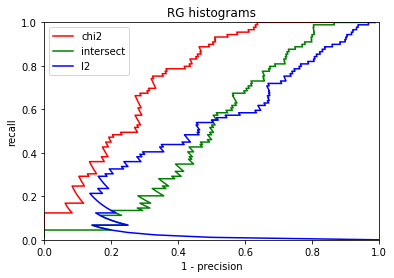

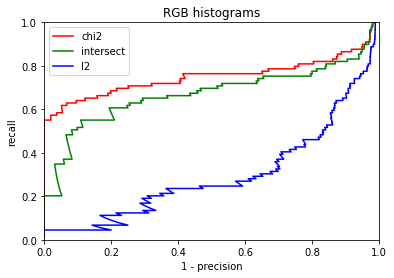

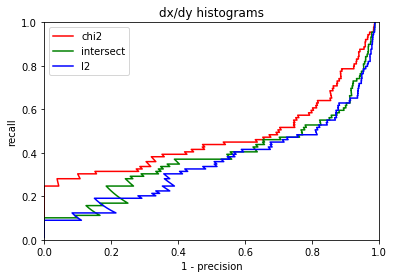

In [21]:
with open('source/model.txt') as fp:
    model_images = fp.readlines()
model_images = [x.strip() for x in model_images] 

with open('source/query.txt') as fp:
    query_images = fp.readlines()
query_images = [x.strip() for x in query_images] 

eval_num_bins = 20;

plt.figure()
compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], 'rg', eval_num_bins, ['r', 'g', 'b'])
plt.title('RG histograms')
plt.show()

plt.figure()
compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], 'rgb', eval_num_bins, ['r', 'g', 'b'])
plt.title('RGB histograms')
plt.show()

plt.figure()
compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], 'dxdy', eval_num_bins, ['r', 'g', 'b'])
plt.title('dx/dy histograms')
plt.show()

Summarize your observations here:

### Our observations:
1. Based on the graphs, we see that using the chi-square distance function gives the best results.  In the rg histogram, the performance compared to l2 and intersection is significantly better. In rgb, the chi2 distance is followed by the intersect distance. Only in the dxdy plot there is no significant difference in performance between all three functions.
2. Increasing threshold values improves recall and decreases accuracy and vice versa.
3. The table below illustrates the best threshold values for each distance and histogram type:
\begin{array}{|c|c|c|c|}
    \hline
       & chi2 & intersect & l2 \\\hline
       rg &  0.048 & 0.069 & 0.053\\\hline
       rgb & 0.330 &  0.264 & 0.070 \\\hline
       dxdy &  0.047 &  0.090 & 0.067\\\hline
\end{array}


<!-- Input your answer here. -->
